# Libraries needed

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
import seaborn as sns

# Reading Excel file

In [2]:
df=pd.read_excel('Horse Colic Dataset.xlsx',na_values='?')
df

,Surgery?,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Nasogastric Reflux PH,Rectal Examination - Feces,Abdomen,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdomcentesis Total Protein,Outcome,Surgical Lesion?,Type of Lesion
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,NaN,3.0,5.0,45.0,8.4,NaN,NaN,2.0,2,11300
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,NaN,4.0,2.0,50.0,85.0,2.0,2.0,3.0,2,2208
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,NaN,1.0,1.0,33.0,6.7,NaN,NaN,1.0,2,0
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,5.0,3.0,NaN,48.0,7.2,3.0,5.3,2.0,1,2208
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,NaN,NaN,NaN,74.0,7.4,NaN,NaN,2.0,2,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2.0,1,529695,38.6,60.0,30.0,1.0,1.0,3.0,1.0,...,NaN,NaN,NaN,40.0,6.0,1.0,NaN,1.0,1,3205
364,2.0,1,528452,37.8,42.0,40.0,1.0,1.0,1.0,1.0,...,NaN,3.0,3.0,36.0,6.2,NaN,NaN,1.0,2,4124
365,1.0,1,534783,38.0,60.0,12.0,1.0,1.0,2.0,1.0,...,NaN,1.0,4.0,44.0,65.0,3.0,2.0,3.0,1,2209
366,2.0,1,528926,38.0,42.0,12.0,3.0,NaN,3.0,1.0,...,NaN,NaN,1.0,37.0,5.8,NaN,NaN,1.0,2,3111


# Checking NaN values in dataframe 

In [3]:
df.isna().sum()

Surgery?                         2
Age                              0
Hospital Number                  0
Rectal Temperature              69
Pulse                           26
Respiratory Rate                71
Temperature of Extremities      65
Peripheral Pulse                83
Mucous Membranes                48
Capillary Refill Time           38
Pain                            63
Peristalsis                     52
Abdominal Distension            65
Nasogastric Tube               131
Nasogastric Reflux             133
Nasogastric Reflux PH          299
Rectal Examination - Feces     128
Abdomen                        143
Packed Cell Volume              37
Total Protein                   43
Abdominocentesis Appearance    194
Abdomcentesis Total Protein    235
Outcome                          2
Surgical Lesion?                 0
Type of Lesion                   0
dtype: int64

# Filling NaN Values using means

In [4]:
df.fillna(df.mean(),inplace=True)
df

,Surgery?,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Nasogastric Reflux PH,Rectal Examination - Feces,Abdomen,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdomcentesis Total Protein,Outcome,Surgical Lesion?,Type of Lesion
0,2.0,1,530101,38.5,66.0,28.0,3.000000,3.000000,2.834375,2.0,...,4.962319,3.000000,5.000000,45.0,8.4,2.045977,2.94812,2.0,2,11300
1,1.0,1,534817,39.2,88.0,20.0,2.356436,1.961404,4.000000,1.0,...,4.962319,4.000000,2.000000,50.0,85.0,2.000000,2.00000,3.0,2,2208
2,2.0,1,530334,38.3,40.0,24.0,1.000000,1.000000,3.000000,1.0,...,4.962319,1.000000,1.000000,33.0,6.7,2.045977,2.94812,1.0,2,0
3,1.0,9,5290409,39.1,164.0,84.0,4.000000,1.000000,6.000000,2.0,...,5.000000,3.000000,3.715556,48.0,7.2,3.000000,5.30000,2.0,1,2208
4,2.0,1,530255,37.3,104.0,35.0,2.356436,1.961404,6.000000,2.0,...,4.962319,2.779167,3.715556,74.0,7.4,2.045977,2.94812,2.0,2,4300
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
363,2.0,1,529695,38.6,60.0,30.0,1.000000,1.000000,3.000000,1.0,...,4.962319,2.779167,3.715556,40.0,6.0,1.000000,2.94812,1.0,1,3205
364,2.0,1,528452,37.8,42.0,40.0,1.000000,1.000000,1.000000,1.0,...,4.962319,3.000000,3.000000,36.0,6.2,2.045977,2.94812,1.0,2,4124
365,1.0,1,534783,38.0,60.0,12.0,1.000000,1.000000,2.000000,1.0,...,4.962319,1.000000,4.000000,44.0,65.0,3.000000,2.00000,3.0,1,2209
366,2.0,1,528926,38.0,42.0,12.0,3.000000,1.961404,3.000000,1.0,...,4.962319,2.779167,1.000000,37.0,5.8,2.045977,2.94812,1.0,2,3111


In [5]:
df.isna().sum()

Surgery?                       0
Age                            0
Hospital Number                0
Rectal Temperature             0
Pulse                          0
Respiratory Rate               0
Temperature of Extremities     0
Peripheral Pulse               0
Mucous Membranes               0
Capillary Refill Time          0
Pain                           0
Peristalsis                    0
Abdominal Distension           0
Nasogastric Tube               0
Nasogastric Reflux             0
Nasogastric Reflux PH          0
Rectal Examination - Feces     0
Abdomen                        0
Packed Cell Volume             0
Total Protein                  0
Abdominocentesis Appearance    0
Abdomcentesis Total Protein    0
Outcome                        0
Surgical Lesion?               0
Type of Lesion                 0
dtype: int64

In [6]:
df.dtypes

Surgery?                       float64
Age                              int64
Hospital Number                  int64
Rectal Temperature             float64
Pulse                          float64
Respiratory Rate               float64
Temperature of Extremities     float64
Peripheral Pulse               float64
Mucous Membranes               float64
Capillary Refill Time          float64
Pain                           float64
Peristalsis                    float64
Abdominal Distension           float64
Nasogastric Tube               float64
Nasogastric Reflux             float64
Nasogastric Reflux PH          float64
Rectal Examination - Feces     float64
Abdomen                        float64
Packed Cell Volume             float64
Total Protein                  float64
Abdominocentesis Appearance    float64
Abdomcentesis Total Protein    float64
Outcome                        float64
Surgical Lesion?                 int64
Type of Lesion                   int64
dtype: object

In [7]:
df.keys()

Index(['Surgery?', 'Age', 'Hospital Number', 'Rectal Temperature', 'Pulse',
       'Respiratory Rate', 'Temperature of Extremities', 'Peripheral Pulse',
       'Mucous Membranes', 'Capillary Refill Time', 'Pain', 'Peristalsis',
       'Abdominal Distension', 'Nasogastric Tube', 'Nasogastric Reflux',
       'Nasogastric Reflux PH', 'Rectal Examination - Feces', 'Abdomen',
       'Packed Cell Volume', 'Total Protein', 'Abdominocentesis Appearance',
       'Abdomcentesis Total Protein', 'Outcome', 'Surgical Lesion?',
       'Type of Lesion'],
      dtype='object')

# Data visualization using histograms

array([[<AxesSubplot:title={'center':'Surgery?'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Hospital Number'}>,
        <AxesSubplot:title={'center':'Rectal Temperature'}>,
        <AxesSubplot:title={'center':'Pulse'}>],
       [<AxesSubplot:title={'center':'Respiratory Rate'}>,
        <AxesSubplot:title={'center':'Temperature of Extremities'}>,
        <AxesSubplot:title={'center':'Peripheral Pulse'}>,
        <AxesSubplot:title={'center':'Mucous Membranes'}>,
        <AxesSubplot:title={'center':'Capillary Refill Time'}>],
       [<AxesSubplot:title={'center':'Pain'}>,
        <AxesSubplot:title={'center':'Peristalsis'}>,
        <AxesSubplot:title={'center':'Abdominal Distension'}>,
        <AxesSubplot:title={'center':'Nasogastric Tube'}>,
        <AxesSubplot:title={'center':'Nasogastric Reflux'}>],
       [<AxesSubplot:title={'center':'Nasogastric Reflux PH'}>,
        <AxesSubplot:title={'center':'Rectal Examination - Feces'}>,
      

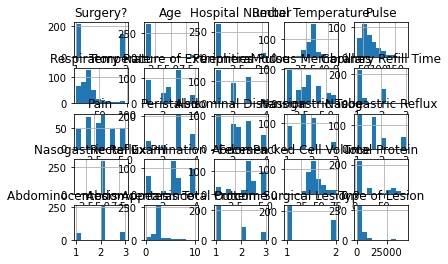

In [8]:
df.hist()

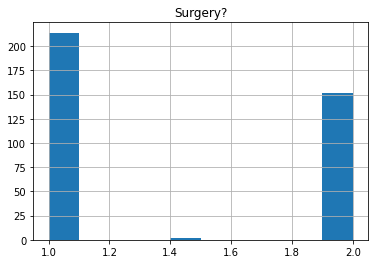

In [9]:
df.hist(column='Surgery?');

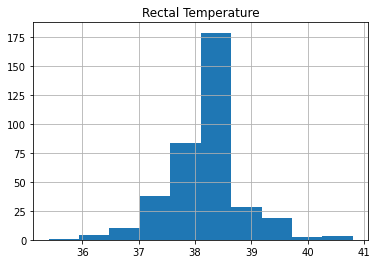

In [10]:
df.hist(column='Rectal Temperature');

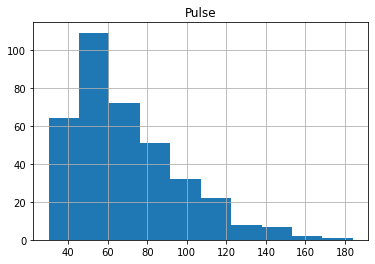

In [11]:
df.hist(column='Pulse');

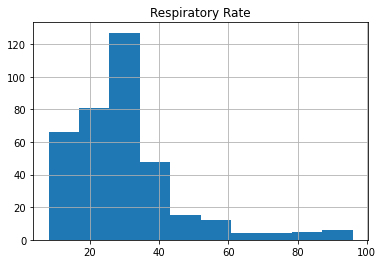

In [12]:
df.hist(column='Respiratory Rate');

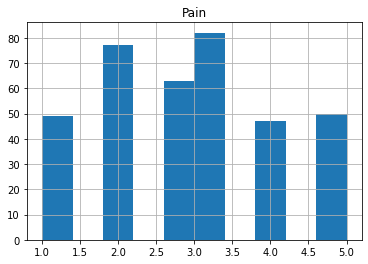

In [13]:
df.hist(column='Pain');

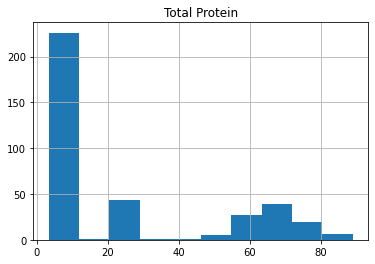

In [14]:
df.hist(column='Total Protein');

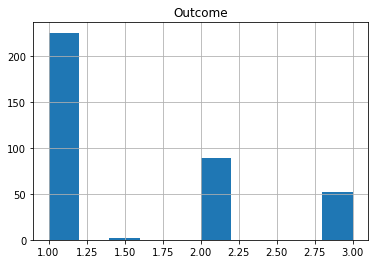

In [15]:
df.hist(column='Outcome');

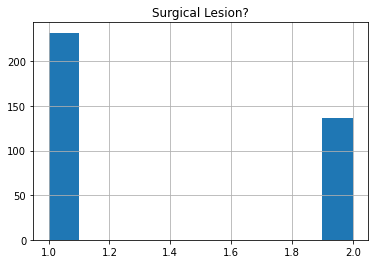

In [16]:
df.hist(column='Surgical Lesion?');

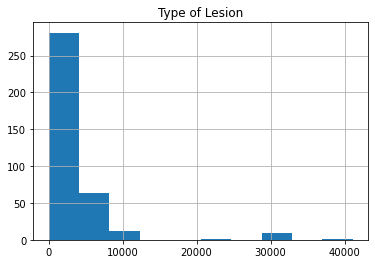

In [17]:
df.hist(column='Type of Lesion');

Text(0.5, 1.0, 'Whole Dataset Visualization')

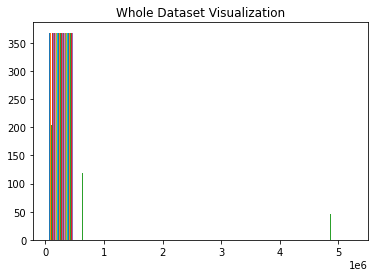

In [18]:
%matplotlib inline
plt.hist(df)
plt.title('Whole Dataset Visualization')

# Pearson correlation

In [19]:
# Pandas default pearson correlation  b/w all attributes
df.corr()

,Surgery?,Age,Hospital Number,Rectal Temperature,Pulse,Respiratory Rate,Temperature of Extremities,Peripheral Pulse,Mucous Membranes,Capillary Refill Time,...,Nasogastric Reflux PH,Rectal Examination - Feces,Abdomen,Packed Cell Volume,Total Protein,Abdominocentesis Appearance,Abdomcentesis Total Protein,Outcome,Surgical Lesion?,Type of Lesion
Surgery?,1.000000,-0.075672,-0.096084,0.005833,-0.186070,-0.165110,-0.104229,-0.215841,-0.178188,-0.085970,...,0.037417,-0.167831,-0.306512,-0.093238,-0.083511,-0.177558,-0.019042,-0.145405,0.613100,-0.189529
Age,-0.075672,1.000000,0.675901,0.163357,0.482249,0.367010,-0.001398,0.085298,0.043656,-0.001388,...,0.023658,-0.090895,-0.034960,-0.082751,-0.119805,-0.032297,-0.036669,0.017378,-0.049852,0.001238
Hospital Number,-0.096084,0.675901,1.000000,0.103757,0.292419,0.249747,-0.021846,0.028582,0.008003,0.044304,...,0.024576,-0.112899,-0.026196,-0.039084,-0.219174,-0.077754,0.001890,-0.008087,-0.113588,0.130379
Rectal Temperature,0.005833,0.163357,0.103757,1.000000,0.193106,0.216792,0.045329,0.063118,0.055805,0.091883,...,0.105001,0.003076,-0.013644,0.064015,-0.013718,-0.059001,-0.010984,-0.055939,0.011404,0.033377
Pulse,-0.186070,0.482249,0.292419,0.193106,1.000000,0.411952,0.300018,0.432952,0.444755,0.356474,...,0.018730,0.191943,0.195943,0.373770,-0.070322,0.231670,0.047273,0.312985,-0.236611,0.038356
Respiratory Rate,-0.165110,0.367010,0.249747,0.216792,0.411952,1.000000,0.108354,0.206927,0.124506,0.071987,...,0.036867,-0.032772,0.081629,0.064935,-0.073159,0.094621,-0.024063,0.058517,-0.208369,0.098296
Temperature of Extremities,-0.104229,-0.001398,-0.021846,0.045329,0.300018,0.108354,1.000000,0.511114,0.334246,0.303054,...,-0.014200,0.226178,0.160971,0.311598,-0.004152,0.338858,0.045077,0.294426,-0.192618,-0.048733
Peripheral Pulse,-0.215841,0.085298,0.028582,0.063118,0.432952,0.206927,0.511114,1.000000,0.437546,0.383474,...,-0.013837,0.235225,0.250927,0.394505,-0.036008,0.315453,0.021525,0.300802,-0.291953,0.061587
Mucous Membranes,-0.178188,0.043656,0.008003,0.055805,0.444755,0.124506,0.334246,0.437546,1.000000,0.451836,...,-0.022994,0.199858,0.195167,0.564147,-0.054033,0.261897,-0.033472,0.385666,-0.218917,-0.087303
Capillary Refill Time,-0.085970,-0.001388,0.044304,0.091883,0.356474,0.071987,0.303054,0.383474,0.451836,1.000000,...,0.033331,0.259575,0.233989,0.409846,-0.065298,0.290322,0.108220,0.279124,-0.133045,0.012387


In [20]:
# Pearson correlation b/w surgery and surical lesion
newDFForCalculatingPearsonCR=df[['Surgery?','Surgical Lesion?']]
newDFForCalculatingPearsonCR.corr()

,Surgery?,Surgical Lesion?
Surgery?,1.0000,0.6131
Surgical Lesion?,0.6131,1.0000


# Features X and target y to be classified 

In [21]:
X=df.drop('Surgical Lesion?',axis=1)
y=df['Surgical Lesion?']

In [22]:
X.shape

(368, 24)

In [23]:
y.value_counts()

1    232
2    136
Name: Surgical Lesion?, dtype: int64

# 5 Fold cross validation

In [24]:
kf=KFold(n_splits=5)

In [25]:
i = 1
for train_set,test_set in kf.split(X=X):
    print("Fold: ", i)
    print(train_set, " {Having:",len(train_set), " Training instances}")
    print(test_set, " {Having:",len(test_set), " Testing instances}")
    print("")
    print("<--------------------------------------------------------------------------------------->")
    print("")
    i+=1

Fold:  1
[ 74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91
  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108 109
 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127
 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145
 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163
 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181
 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199
 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217
 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235
 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253
 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271
 272 273 274 275 276 277 278 279 280 281 282 283 284 285 286 287 288 289
 290 291 292 293 294 295 296 297 298 299 300 301 302 303 304 305 306 307
 308 309 310 311 312 313 314 315 316 317 3

# Applying Naive Bayes

In [26]:
model=GaussianNB()

In [27]:
scores=[]
i=1
for train_set, test_set in kf.split(X):
    model.fit(X.loc[train_set],y[train_set])
    score=model.score(X.loc[test_set],y[test_set])
    scores.append(score)
    print("Iteration ",i, " -> successful")
    i+=1
    

Iteration  1  -> successful
Iteration  2  -> successful
Iteration  3  -> successful
Iteration  4  -> successful
Iteration  5  -> successful


In [28]:
np.array(scores)

array([0.47297297, 0.43243243, 0.52702703, 0.60273973, 0.53424658])

In [29]:
# Mean Accuracy
np.array(scores).mean()

0.513883746760459

In [30]:
# Standard deviation, while shifting b/w diff testing and training folds
np.array(scores).std()

0.0579496051292261

# PCA 

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368 entries, 0 to 367
Data columns (total 25 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Surgery?                     368 non-null    float64
 1   Age                          368 non-null    int64  
 2   Hospital Number              368 non-null    int64  
 3   Rectal Temperature           368 non-null    float64
 4   Pulse                        368 non-null    float64
 5   Respiratory Rate             368 non-null    float64
 6   Temperature of Extremities   368 non-null    float64
 7   Peripheral Pulse             368 non-null    float64
 8   Mucous Membranes             368 non-null    float64
 9   Capillary Refill Time        368 non-null    float64
 10  Pain                         368 non-null    float64
 11  Peristalsis                  368 non-null    float64
 12  Abdominal Distension         368 non-null    float64
 13  Nasogastric Tube    

In [32]:
X.values
y.values

array([2, 2, 2, 1, 2, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 2, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 1,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 2, 1,
       1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 2, 2,

In [33]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [34]:
# Scalling data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [35]:
# Applying PCA
pca=PCA(n_components=8)
X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)
pca.explained_variance_ratio_

array([0.20531211, 0.09629659, 0.0709365 , 0.06281243, 0.05034223,
       0.04660429, 0.04331401, 0.04250716])

# Applying Naive Bayes again

In [36]:
newmodel=GaussianNB()
newmodel.fit(X_train,y_train)
newmodel.score(X_test,y_test)

0.8648648648648649

In [37]:
y_test.values

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 1, 1], dtype=int64)

In [38]:
y_pred=newmodel.predict(X_test)
y_pred

array([1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2,
       1, 2, 2, 1, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 1, 1], dtype=int64)

# Confusion Matrix & Precision

Text(159.0, 0.5, 'Actual')

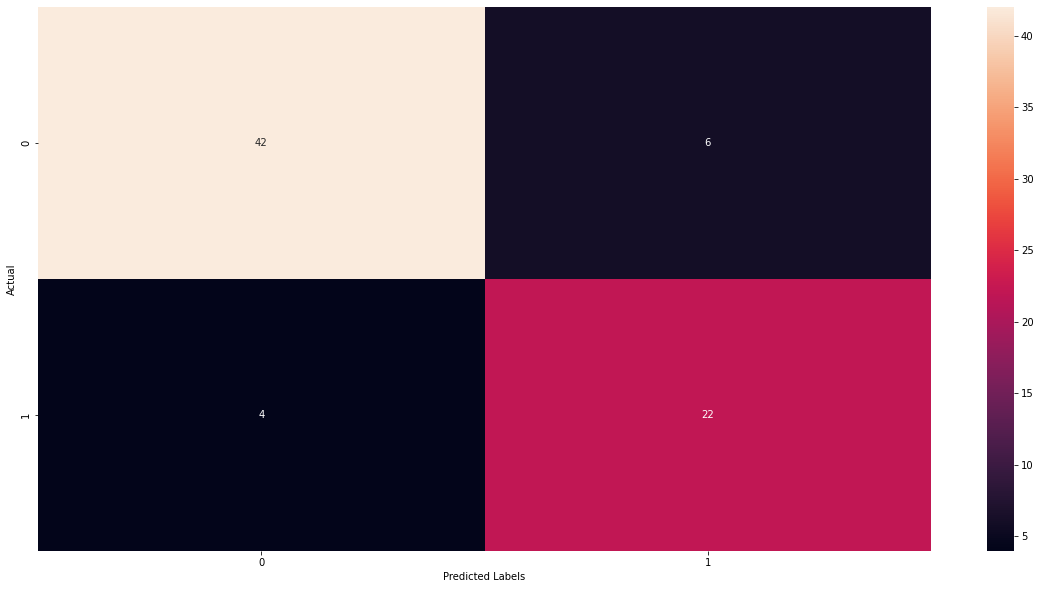

In [39]:
cm=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True)
plt.xlabel('Predicted Labels')
plt.ylabel('Actual')

In [40]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.91      0.88      0.89        48
           2       0.79      0.85      0.81        26

    accuracy                           0.86        74
   macro avg       0.85      0.86      0.85        74
weighted avg       0.87      0.86      0.87        74

